We load numpy and matplotlib to setup the Python environment

In [1]:
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

### Given X, returns T coordinate of a light-ray moving to the left or to the right according to eq. (15)

In [4]:
def ray_to_right(X,Xo):
    return np.log(X/Xo)

In [5]:
def ray_to_left(X,Xo):
    return -np.log(X/Xo)

In [6]:
X = np.linspace(0.1,2.5)  #we are going to evaluate the trajectories at evenly spaced X points between 0.1 and 2.5

#### We draw light rays that cross the axis at X=0.5,1,1.5,2 as in Fig. 7.1 on page 143

In [63]:
Xo=[0.5,1,1.5,2,2.5]  # we are goint to plot light rays that cross the X-axis at these locations

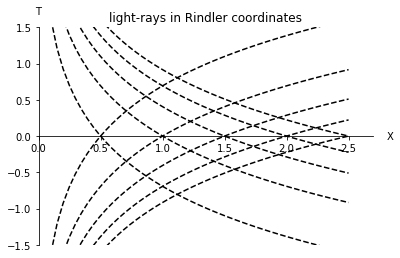

In [56]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('light-rays in Rindler coordinates')
for i in range(len(Xo)):
    ax.plot(X,ray_to_right(X,Xo[i]),'k--')  # plot ray to the right
    ax.plot(X,ray_to_left(X,Xo[i]),'k--')   # plot ray moving leftwards

# below we set the boundary of the plot and draw axes and labels
ax.set_xlim([0,2.7])
ax.set_ylim([-1.5,1.5])
ax.set_xlabel('X')
ax.xaxis.set_label_coords(1.05,0.52)
ax.set_ylabel('T',rotation=0)
ax.yaxis.set_label_coords(0,1.05)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

#### We can plot the trajectories of Rindler observers at rest at X=0.5, 1, 1.5,... as seen from the inertial observer using (t,x) coordinates.

In [61]:
tau = np.linspace(-10,10,100) # T values that we are going to sample

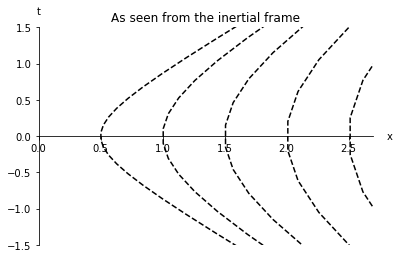

In [64]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('As seen from the inertial frame')

for i in range(len(Xo)):
    ax.plot(Xo[i]*np.cosh(tau),Xo[i]*np.sinh(tau),'k--')  # plot observers that are at rest at the same Xo values as before
    
ax.set_xlim([0,2.7])
ax.set_ylim([-1.5,1.5])
ax.set_xlabel('x')
ax.xaxis.set_label_coords(1.05,0.52)
ax.set_ylabel('t',rotation=0)
ax.yaxis.set_label_coords(0,1.05)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

We can see that they look like accelerated observers. Let us draw a few more lines, and show also lines of constant T to get an idea of the grid. You should compare this plot to the more familiar two observer diagram showing the (t',x') grid of another intertial observer in the (t,x) axes.

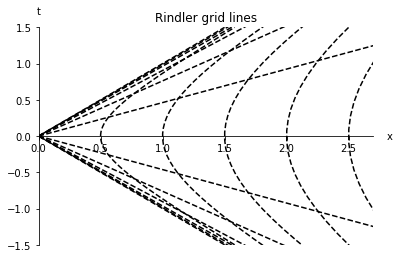

In [59]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Rindler grid lines')

Xo=[0.5,1,1.5,2,2.5]

T = np.linspace(-np.arcsinh(3),np.arcsinh(3))  # choose T values a bit more wisely

for i in range(len(Xo)):
    ax.plot(Xo[i]*np.cosh(T),Xo[i]*np.sinh(T),'k--')  # plot lines of constant X in t-x plane
    

# For smaller values of Xo the lines become very singular. At Xo=0, it is only the point (0,0). I plot the line
# at Xo=0.01 separately for this reason

Xo=0.01

T = np.linspace(-np.arcsinh(1.5/Xo),np.arcsinh(1.5/Xo))
ax.plot(Xo*np.cosh(T),Xo*np.sinh(T),'k--')

ax.set_xlim([0,2.7])
ax.set_ylim([-1.5,1.5])


# now we plot lines of constant T. They are straight lines as you can see from eq. (2)

X=np.linspace(0,2.7)

T=[0.5,1,1.5,2,2.5]

for i in range(len(T)):
    ax.plot(X*np.cosh(T[i]),X*np.sinh(T[i]),'k--')    # positive values of T
    ax.plot(X*np.cosh(-T[i]),X*np.sinh(-T[i]),'k--')  # negative values of T


ax.set_xlabel('x')
ax.xaxis.set_label_coords(1.05,0.52)
ax.set_ylabel('t',rotation=0)
ax.yaxis.set_label_coords(0,1.05)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

#### How does an inertial observer at rest look like from the point of view of the (T, X) frame? 

We can set x=constant in eq. (7) and plot the trajectories. We notice that as t increases, the coordinate X becomes imaginary for fixed x=xo. This is consistent with the fact that the accelerated observers using (T,X) coordinates have a horizon, so the inertial observers end up disappearing from their view.

/usr/lib/python3/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in arctanh
/usr/lib/python3/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in arctanh


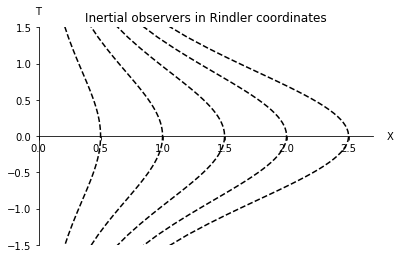

In [65]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Inertial observers in Rindler coordinates')

xo=[0.5,1,1.5,2,2.5]


for i in range(len(xo)):
    t = np.linspace(-xo[i],xo[i]) # t can at most be xo if X has to be real
    ax.plot(np.sqrt(xo[i]**2-t**2),np.arctanh(t/xo[i]),'k--')  # positive square root in X^2=x^2-t^2 expression
    ax.plot(-np.sqrt(xo[i]**2-t**2),np.arctanh(t/xo[i]),'k--') # - square root
    
ax.set_xlim([0,2.7])
ax.set_ylim([-1.5,1.5])
ax.set_xlabel('X')
ax.xaxis.set_label_coords(1.05,0.52)
ax.set_ylabel('T',rotation=0)
ax.yaxis.set_label_coords(0,1.05)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

Note that all the inertial observers are seen to accelerate leftwards towards X=0, where they disappear from the view of the Rindler frame.